In [1]:

import os
import json

from tqdm.auto import tqdm


data_path = '/home/heyjoonkim/data/datasets/clinc'
domain_file = 'domains.json'
data_file = 'data_full.json'

split_keys = ['train', 'val', 'test']

In [2]:


full_data_path = os.path.join(data_path, domain_file)
with open(full_data_path, 'r') as f:
    domain_keys = json.load(f)

    coarse_labels = list(domain_keys.keys())

labels_dict = {}
for coarse_label, fine_labels in domain_keys.items():
    print(coarse_label, len(fine_labels))
    for fine_label in fine_labels:
        labels_dict[fine_label] = coarse_label

print('\n\ncoarse label :', len(coarse_labels), coarse_labels)
print('fine labels  :', len(labels_dict.keys()))

banking 15
credit_cards 15
kitchen_and_dining 15
home 15
auto_and_commute 15
travel 15
utility 15
work 15
small_talk 15
meta 15


coarse label : 10 ['banking', 'credit_cards', 'kitchen_and_dining', 'home', 'auto_and_commute', 'travel', 'utility', 'work', 'small_talk', 'meta']
fine labels  : 150


In [13]:
full_data_path = os.path.join(data_path, data_file)
with open(full_data_path, 'r') as f:
    data = json.load(f)

In [28]:
for split_key in split_keys:
    split_data_dict_list = []
    for sample in tqdm(data.get(split_key), desc=f'Loading split {split_key}'):
        text, fine_label = sample
        coarse_label = labels_dict.get(fine_label)
        data_dict = {
            'text' : text,
            'coarse_label' : coarse_label,
            'fine_label' : fine_label,
        }
        split_data_dict_list.append(data_dict)

    file_name = f'{split_key}.jsonl'
    file_output_dir = os.path.join(data_path, file_name)
    with open(file_output_dir, 'w') as f:
        json.dump(split_data_dict_list, f)
        
    

Loading split train:   0%|          | 0/15000 [00:00<?, ?it/s]

Loading split val:   0%|          | 0/3000 [00:00<?, ?it/s]

Loading split test:   0%|          | 0/4500 [00:00<?, ?it/s]

In [4]:
from datasets import load_dataset
x = load_dataset('json', data_files='/home/heyjoonkim/data/datasets/clinc/train.jsonl')['train']

Using custom data configuration default-d5d86bf127b5874a
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-d5d86bf127b5874a/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
b = x.filter(lambda sample: sample['coarse_label'] in [0,1])

  0%|          | 0/15 [00:00<?, ?ba/s]

In [14]:
len(list(set(b['fine_label'])))

30

In [22]:
a = b.to_dict()


In [24]:
tmp = map(lambda index: -1 if index in [0,1,2] else index, a['fine_label'])

SyntaxError: invalid syntax (1500807503.py, line 1)

In [16]:
for i, c in enumerate(a['fine_label']):
    if c in [0,1,2,3,4]:
        a['fine_label'][i] = 9999


In [17]:
from datasets import Dataset

c = Dataset.from_dict(a)

In [18]:
len(list(set(c['fine_label'])))

26

In [2]:
from datasets import load_dataset

train = load_dataset('json', data_files='/home/heyjoonkim/data/datasets/clinc/1234_2/source_train.jsonl')
val = load_dataset('json', data_files='/home/heyjoonkim/data/datasets/clinc/1234_2/source_val.jsonl')
test = load_dataset('json', data_files='/home/heyjoonkim/data/datasets/clinc/1234_2/target_test.jsonl')

InvalidConfigName: Bad characters from black list '<>:/\|?*' found in '/home/heyjoonkim/data/datasets/clinc/1234_2/source_train.jsonl'. They could create issues when creating a directory for this config on Windows filesystem.

In [1]:
import torch
a = torch.tensor([1, 1, 5, 5])

In [2]:
x = a > 3

In [3]:
a[x] = 999
print(a)


tensor([  1,   1, 999, 999])


In [2]:
for th in range(0.0, 1.0, 0.1):
    print(th)

TypeError: 'float' object cannot be interpreted as an integer

In [1]:

import argparse
parser = argparse.ArgumentParser(description="Universal Domain Adaptation in NLU.")

parser.add_argument(
    "--pad_to_max_length",
    action="store_true",
    help="If passed, pad all samples to `max_length`. Otherwise, dynamic padding is used.",
)

_StoreTrueAction(option_strings=['--pad_to_max_length'], dest='pad_to_max_length', nargs=0, const=True, default=False, type=None, choices=None, help='If passed, pad all samples to `max_length`. Otherwise, dynamic padding is used.', metavar=None)

In [7]:
from datasets import load_dataset

TASK_DICT = {
    'clinc' : 'clinc',
    'trec' : 'trec',
    'massive' : 'AmazonScience/massive',
}

# load dataset
def load_full_dataset(DATA_PATH, task_name, seed, num_common_class):
    # set dataset path
    data_path = os.path.join(DATA_PATH, task_name, f'{seed}_{num_common_class}')
    train_path = os.path.join(data_path, 'source_train.jsonl')
    train_unlabeled_path = os.path.join(data_path, 'target_train_unlabeled.jsonl')
    val_path = os.path.join(data_path, 'source_val.jsonl')
    test_path = os.path.join(data_path, 'target_test.jsonl')
    source_test_path = os.path.join(data_path, 'source_test.jsonl')

    # load dataset
    train_data = load_dataset('json', data_files=train_path)['train']
    train_unlabeled_data = load_dataset('json', data_files=train_unlabeled_path)['train']
    val_data = load_dataset('json', data_files=val_path)['train']
    test_data = load_dataset('json', data_files=test_path)['train']
    source_test_data = load_dataset('json', data_files=source_test_path)['train']

    return train_data, train_unlabeled_data, val_data, test_data, source_test_data

DATA_PATH='/home/heyjoonkim/data/datasets/'
train_data, train_unlabeled_data, val_data, test_data, source_test_data = load_full_dataset(DATA_PATH, 'clinc', 1234, 2)
    

Using custom data configuration default-efa927ea9d9142bb
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-efa927ea9d9142bb/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-3ec5b5793b325bdc
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-3ec5b5793b325bdc/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-6ac77cb7d9a0ae86
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-6ac77cb7d9a0ae86/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-5ac9df325988972a
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-5ac9df325988972a/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-a84402e282185aba
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-a84402e282185aba/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
test_data[0]

{'text': 'set a 4 minute timer', 'coarse_label': 6, 'fine_label': 95}

In [9]:
set(train_data['coarse_label'])

{0, 1, 2, 3, 4, 5}

In [10]:
set(test_data['coarse_label'])

{1, 3, 6}

In [14]:
x = test_data.filter(lambda x: x['coarse_label'] == 3)

  0%|          | 0/3 [00:00<?, ?ba/s]

In [1]:
from datasets import load_dataset

In [5]:
massive = load_dataset('AmazonScience/massive', 'en-US')

Reusing dataset massive (/home/heyjoonkim/.cache/huggingface/datasets/AmazonScience___massive/en-US/1.0.0/c06e96faea378f5cbba9f6ba50b7ea33fb3f91d4256bfa26cd23a54421d154e5)


  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:

data_path = '/home/heyjoonkim/data/datasets/massive/'
train_path = data_path + 'train.jsonl'
validation_path = data_path + 'validation.jsonl'
test_path = data_path + 'test.jsonl'


train_dataset = load_dataset('json', data_files=train_path)['train']
validation_dataset = load_dataset('json', data_files=validation_path)['train']
test_dataset = load_dataset('json', data_files=test_path)['train']

Using custom data configuration default-efc85ff1e5f18d9e
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-efc85ff1e5f18d9e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-05173d73c332f90e
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-05173d73c332f90e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-eefd2b2e594458ef
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-eefd2b2e594458ef/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
F = 'fine_label'
C = 'coarse_label'

In [33]:
d = dict()
for sample in train_dataset:
    f, c = sample.get(F), sample.get(C)
    if f in d.keys():
        l = d[f]
        l.append(c)
        l = list(set(l))
        d[f] = sorted(l)
    else:
        d[f] = [c, ]

In [36]:
keys = sorted(list(d.keys()))
x = []
for key in keys:
    print(key, d.get(key))

    c = d.get(key)
    x = x + d.get(key)

print()
print(list(sorted(x)))

0 [27, 47]
1 [2, 11, 42, 54]
2 [30, 32, 50]
3 [20, 36, 45, 51, 58]
4 [22]
5 [0, 38]
6 [6, 19, 55]
7 [15, 17, 33, 44]
8 [1, 8, 18, 24, 31, 34, 40, 41, 56]
9 [5, 12, 25]
10 [14, 29, 35, 46]
11 [21, 53, 59]
12 [4, 10, 26, 39, 49]
13 [9, 37]
14 [3, 16]
15 [7, 28, 43, 57]
16 [23, 48, 52]
17 [13]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [39]:
keys = sorted(list(d.keys()))
for key in keys:
    print(f'\n\n{key}')

    X = d.get(key)
    for x in X:
        f = train_dataset.filter(lambda sample : sample[C] == x)
        print(x, len(f))


Loading cached processed dataset at /home/heyjoonkim/.cache/huggingface/datasets/json/default-efc85ff1e5f18d9e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5/cache-046fb8fab06e5482.arrow
Loading cached processed dataset at /home/heyjoonkim/.cache/huggingface/datasets/json/default-efc85ff1e5f18d9e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5/cache-5ea5c2bb2676df12.arrow
Loading cached processed dataset at /home/heyjoonkim/.cache/huggingface/datasets/json/default-efc85ff1e5f18d9e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5/cache-3df8610eb22dd185.arrow
Loading cached processed dataset at /home/heyjoonkim/.cache/huggingface/datasets/json/default-efc85ff1e5f18d9e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5/cache-3038776b6270a6c0.arrow
Loading cached processed dataset at /home/heyjoonkim/.cache/huggingface/datasets/json/default-efc85ff1e5f18d9e/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b6



0
27 108
47 283


1
2 127
11 117
42 227
54 100


2
30 312
32 566
50 810


3
20 150
36 283
45 639
51 112
58 193


4
22 503


5
0 350
38 52


6
6 190
19 173
55 70


7
15 54
17 127
33 354
44 418


8
1 125
8 52
18 76
24 48
31 76
34 93
40 153
41 22
56 124


9
5 25
12 555
25 72


10
14 110
29 18
35 52
46 110


11
21 177
53 164
59 198


12
4 152
10 142
26 267
39 78
49 544


13
9 207
37 4


14
3 122
16 135


15
7 14
28 51
43 113
57 154


16
23 130
48 182
52 78


17
13 573


In [41]:
a = {1, 2, 3}

In [43]:
b = {2, 3}

In [46]:
x = a.intersection({})

In [48]:
len(x)

0

In [49]:

DATASET_PATH = '/home/heyjoonkim/data/datasets/massive/1234_8/'
train_path = DATASET_PATH + 'train.jsonl'
validation_path = DATASET_PATH + 'validation.jsonl'
test_path = DATASET_PATH + 'test.jsonl'

In [50]:
train_dataset = load_dataset('json', data_files=train_path)['train']
validation_dataset = load_dataset('json', data_files=validation_path)['train']
test_dataset = load_dataset('json', data_files=test_path)['train']

FileNotFoundError: Unable to find '/home/heyjoonkim/data/datasets/massive/1234_8/train.jsonl' at /home/heyjoonkim/UniDA/data_preprocessing

In [51]:
s = {1, 4, 5, 8, 11, 13, 14, 16, 18, 20, 22, 23, 24, 27, 28, 30, 31, 32, 34, 35, 39, 40, 41, 42, 48, 50, 52, 56, 57, 58}
t = {0, 2, 3, 6, 7, 9, 10, 12, 15, 17, 19, 21, 25, 26, 29, 33, 36, 37, 38, 43, 44, 45, 46, 47, 49, 51, 53, 54, 55, 59}

In [52]:
s.intersection(t)

set()

In [26]:
from datasets import load_dataset

data_path = '/home/heyjoonkim/data/datasets/trec/'
train_path = data_path + 'train.jsonl'
# validation_path = data_path + 'validation.jsonl'
test_path = data_path + 'test.jsonl'


train_dataset = load_dataset('json', data_files=train_path)['train']
# validation_dataset = load_dataset('json', data_files=validation_path)['train']
test_dataset = load_dataset('json', data_files=test_path)['train']

Using custom data configuration default-1775e2d6d9183047
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-1775e2d6d9183047/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-e21c3bd22a4fa354
Reusing dataset json (/home/heyjoonkim/.cache/huggingface/datasets/json/default-e21c3bd22a4fa354/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)


  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
F = 'fine_label'
C = 'coarse_label'

d = dict()
for sample in train_dataset:
    f, c = sample.get(F), sample.get(C)
    if c in d.keys():
        l = d[c]
        l.append(f)
        l = list(set(l))
        d[c] = sorted(l)
        if f == 12:
            print(c, f)
    else:
        d[c] = [f, ]

0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
3 12
3 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
3 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
3 12
0 12
0 12
3 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
3 12
0 12
3 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 12
3 12
0 12


In [24]:
d

{0: [0, 7, 9, 12],
 1: [1,
  2,
  10,
  14,
  15,
  16,
  17,
  19,
  20,
  22,
  23,
  26,
  28,
  29,
  30,
  31,
  33,
  36,
  37,
  42,
  44,
  46],
 2: [3, 34],
 3: [4, 5, 6, 12],
 4: [8, 13, 14, 25, 27, 32, 35, 38, 39, 40, 41, 43, 45],
 5: [11, 14, 18, 21, 24]}

In [14]:
trec = load_dataset('trec')

Using custom data configuration default
Reusing dataset trec (/home/heyjoonkim/.cache/huggingface/datasets/trec/default/1.1.0/751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)


  0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
trec

DatasetDict({
    train: Dataset({
        features: ['label-coarse', 'label-fine', 'text'],
        num_rows: 5452
    })
    test: Dataset({
        features: ['label-coarse', 'label-fine', 'text'],
        num_rows: 500
    })
})

In [29]:
x = load_dataset('trec')

Using custom data configuration default
Reusing dataset trec (/home/heyjoonkim/.cache/huggingface/datasets/trec/default/1.1.0/751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)


  0%|          | 0/2 [00:00<?, ?it/s]

In [30]:
train = x['train']

In [40]:
train

Dataset({
    features: ['label-coarse', 'label-fine', 'text'],
    num_rows: 5452
})

In [31]:
set(train['label-coarse'])

{0, 1, 2, 3, 4, 5}

In [34]:
print(set(train['label-fine']), len(set(train['label-fine'])))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46} 47


In [35]:
test = x['train']
print(set(test['label-coarse']))
print(set(test['label-fine']), len(set(test['label-fine'])))

{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46} 47


In [39]:
for i in range(6):
    tmp = train.filter(lambda x: x['label-coarse'] == i)
    print(i, '->', set(tmp['label-fine']))

Loading cached processed dataset at /home/heyjoonkim/.cache/huggingface/datasets/trec/default/1.1.0/751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9/cache-9b99e6ebf6730d8a.arrow


0 -> {0, 9, 12, 7}


  0%|          | 0/6 [00:00<?, ?ba/s]

1 -> {1, 2, 10, 14, 15, 16, 17, 19, 20, 22, 23, 26, 28, 29, 30, 31, 33, 36, 37, 42, 44, 46}


  0%|          | 0/6 [00:00<?, ?ba/s]

2 -> {34, 3}


  0%|          | 0/6 [00:00<?, ?ba/s]

3 -> {12, 4, 5, 6}


  0%|          | 0/6 [00:00<?, ?ba/s]

4 -> {32, 35, 38, 39, 8, 40, 41, 43, 13, 14, 45, 25, 27}


  0%|          | 0/6 [00:00<?, ?ba/s]

5 -> {11, 14, 18, 21, 24}


In [7]:
import torch
import random
from datasets import load_metric

In [8]:

class Accuracy:
    def __init__(self):
        self.predictions = []
        self.references = []
        self.num_samples = 0

    def add_batch(self, predictions, references):
        prediction_count = predictions.shape[0]
        reference_count = references.shape[0]
        assert prediction_count == reference_count, f'{prediction_count} != {reference_count}'
        self.num_samples += prediction_count

        self.predictions.append(predictions)
        self.references.append(references)

        assert len(self.predictions) == len(self.references), f'{len(self.predictions)} != {len(self.references)}'
    
    def compute(self):
        # shape : (num_samples, )
        predictions = torch.concat(self.predictions)
        # shape : (num_samples, )
        references = torch.concat(self.references)

        correct = predictions == references

        num_total = len(correct)
        num_correct = len(correct[correct == True])
        accuracy = num_correct / num_total 

        return {
            'accuracy' : accuracy,
            'num_samples' : self.num_samples
        }
        



In [18]:
import time
start = time.time()
acc_transformers = load_metric('accuracy')
acc_mine = Accuracy()
for _ in range(10000):
    pred = []
    ref = []
    for __ in range(8):
        pred.append(random.randint(0, 1))
        ref.append(random.randint(0, 1))

    pred = torch.tensor(pred)
    ref = torch.tensor(ref)

    acc_mine.add_batch(predictions=pred, references=ref)
    acc_transformers.add_batch(predictions=pred, references=ref)


In [19]:

mine_results = acc_mine.compute()
transformers_results = acc_transformers.compute()

print('mine        ', mine_results['accuracy'])
print('transformers', transformers_results['accuracy'])

mine         0.4991
transformers 0.4991


In [20]:
import time
start_time = time.time()
# acc_transformers = load_metric('accuracy')
acc_mine = Accuracy()
for _ in range(10000):
    pred = []
    ref = []
    for __ in range(8):
        pred.append(random.randint(0, 1))
        ref.append(random.randint(0, 1))

    pred = torch.tensor(pred)
    ref = torch.tensor(ref)

    acc_mine.add_batch(predictions=pred, references=ref)
    # acc_transformers.add_batch(predictions=pred, references=ref)

mine_results = acc_mine.compute()
print('mine        ', mine_results['accuracy'])
end_time = time.time()
print('time :', end_time-start_time)

mine         0.4963125
time : 0.4064924716949463


In [21]:
import time
start_time = time.time()
acc_transformers = load_metric('accuracy')
# acc_mine = Accuracy()
for _ in range(10000):
    pred = []
    ref = []
    for __ in range(8):
        pred.append(random.randint(0, 1))
        ref.append(random.randint(0, 1))

    pred = torch.tensor(pred)
    ref = torch.tensor(ref)

    # acc_mine.add_batch(predictions=pred, references=ref)
    acc_transformers.add_batch(predictions=pred, references=ref)

# mine_results = acc_mine.compute()
transformers_results = acc_transformers.compute()

# print('mine        ', mine_results['accuracy'])
print('transformers', transformers_results['accuracy'])
end_time = time.time()
print('time :', end_time-start_time)

transformers 0.5009875
time : 5.53059983253479


In [1]:
import torch

In [14]:
a = torch.tensor([[65165, 65168,2113], [1,2,3], [3,3,9]]).float()
# a = torch.tensor([65168, 2, 51,65168,2113,87]).float()
b = torch.nn.Softmax(dim=-1)(a)
print(b)

tensor([[0.0474, 0.9526, 0.0000],
        [0.0900, 0.2447, 0.6652],
        [0.0025, 0.0025, 0.9951]])


In [15]:
x = b.argmax(dim=-1)
print(x)

tensor([1, 2, 2])


In [19]:
y = b[x]
print(y)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0025, 0.0025, 0.9951],
        [0.0025, 0.0025, 0.9951]])


In [25]:

thresholds = [0.5]
num_thresholds = len(thresholds)
predictions = torch.tensor([1, 1, 2, 0])
unknown_label = 9999
logits = torch.tensor([
    [0.1, 0.8, 0.1],
    [0.3, 0.5, 0.2], 
    [0.05, 0.05, 0.9],
    [0.4, 0.3, 0.3]
])

for index in range(num_thresholds):
    # tmp_predictions = copy.deepcopy(predictions)
    tmp_predictions = predictions.clone().detach()
    threshold = thresholds[index]
    print(threshold)

    m = logits.max(dim=-1).values
    print(m)

    # get "unknown" indices 
    unknown = (m < threshold).squeeze()

    # update "unknown" predictions
    tmp_predictions[unknown] = unknown_label


print(tmp_predictions)

0.5
tensor([0.8000, 0.5000, 0.9000, 0.4000])
tensor([   1,    1,    2, 9999])


In [2]:
import numpy as np
import torch

class HScore():
    def __init__(self, unknown_class_index):
        self.unknown_class_index = unknown_class_index

        self.per_class_correct = np.zeros((unknown_class_index+1)).astype(np.float32)
        self.per_class_num = np.zeros((unknown_class_index+1)).astype(np.float32)

    # predictions : (batch, )
    # references : (batch, )
    def add_batch(self, predictions, references):

        batch_size = predictions.shape[0]

        for index in range(batch_size):
            prediction = predictions[index].detach().cpu().numpy()
            reference = references[index].detach().cpu().numpy()

            if prediction == reference:
                self.per_class_correct[reference] += 1
            
            self.per_class_num[reference] += 1


    def compute(self):
        # number of valid classes
        valid_index = ~(self.per_class_num == 0)
        valid_count = np.count_nonzero(valid_index)
        per_class_correct = self.per_class_correct[valid_index]
        per_class_num = self.per_class_num[valid_index]

        import pdb
        pdb.set_trace()

        per_class_accuracy = per_class_correct / per_class_num

        known_accuracy = per_class_accuracy[:valid_count-1].mean() * 100
        unknown_accuracy = per_class_accuracy[valid_count-1] * 100
        h_score = 2 * known_accuracy * unknown_accuracy / (known_accuracy + unknown_accuracy)
            
        total_correct = per_class_correct.sum()
        total_samples = per_class_num.sum()
        accuracy = total_correct / total_samples * 100

        return {
            'h_score' : h_score,
            'known_accuracy' : known_accuracy,
            'unknown_accuracy' : unknown_accuracy,
            'accuracy' : accuracy
        }

In [3]:
h = HScore(3)

In [4]:
x = torch.tensor([0, 0, 1, 1, 2, 2, 3, 3])
y = torch.tensor([1, 1, 1, 1, 3, 3, 3, 3])
h.add_batch(x,y)

In [5]:
h.compute()

> /tmp/ipykernel_587138/1942383704.py(37)compute()
     35         pdb.set_trace()
     36 
---> 37         per_class_accuracy = per_class_correct / per_class_num
     38 
     39         known_accuracy = per_class_accuracy[:valid_count-1].mean() * 100

array([False,  True, False,  True])
array([False,  True, False,  True])
array([0., 4., 0., 4.], dtype=float32)
2
array([2., 2.], dtype=float32)
array([2., 2.], dtype=float32)
array([0., 4., 0., 4.], dtype=float32)
array([4., 4.], dtype=float32)
array([0.5, 0.5], dtype=float32)
array([0.5, 0.5], dtype=float32)


BdbQuit: 

In [1]:
import os

In [19]:
import os
sources=['amazon', 'dslr', 'webcam']

for source in sources:
    path = f'/home/heyjoonkim/data/datasets/office/{source}/images'
    output_path = f'/home/heyjoonkim/data/datasets/office/{source}'

    file_lists = os.listdir(path)
    sorted_file_lists = sorted(file_lists)

    output_file = os.path.join(output_path, 'image_list.txt')
    with open(output_file, 'a') as f:
        for label, class_name in enumerate(sorted_file_lists):
            new_path = os.path.join(path, class_name)
            item_list = os.listdir(new_path)
            sorted_item_list = sorted(item_list)
            for item in sorted_item_list:
                f.write(f'images/{class_name}/{item} {label}\n')


In [3]:


TASK_TO_NUM_CLASS = {
    "visda" : {
        "num_total" : 12,
        "num_known" : 3,
        "num_unknown" : 3,
        "num_common" : 6
    },
    "office" : {
        "num_total" : 31,
        "num_known" : 10,
        "num_unknown" : 11,
        "num_common" : 10
    },
}

# path for splitted data
DATA_PATH='/home/heyjoonkim/data/datasets/'

task_name = 'office'
n_total = TASK_TO_NUM_CLASS[task_name]["num_total"]
n_source_private = TASK_TO_NUM_CLASS[task_name]["num_known"]
n_share = TASK_TO_NUM_CLASS[task_name]["num_common"]


In [15]:

sources=['amazon', 'dslr', 'webcam']
for source in sources:
    path = f'/home/heyjoonkim/data/datasets/office/{source}/images'
    output_path = f'/home/heyjoonkim/data/datasets/office/{source}'

    file_lists = os.listdir(path)
    sorted_file_lists = sorted(file_lists)
    total = 0
    output_file = os.path.join(output_path, 'image_list.txt')
    for label, class_name in enumerate(sorted_file_lists):
        new_path = os.path.join(path, class_name)
        item_list = os.listdir(new_path)
        count = len(item_list)
        # print(label, class_name, count)
        total += count

    print(source, total)

amazon 2817
dslr 498
webcam 795


In [14]:
total

2817

In [1]:
import matplotlib.pyplot as plt

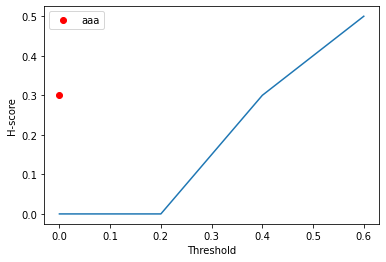

In [5]:
hscore = [0, 0, 0.3, 0.5]
th = [0, 0.2, 0.4, 0.6]

plt.plot(th, hscore)
plt.plot(0, 0.3, 'ro', label='aaa')
plt.xlabel('Threshold')
plt.ylabel('H-score')

plt.legend()
# plt.savefig('test.png')

In [4]:
import numpy as np
thresholds = list(np.arange(-2, 1, 0.005))
